## Hardware Incident Dataset (Flag 94)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
Goal: Find the discrepancy and imbalance in distribution of incidents assigned across categories 

Role: L2 Support Agent

Difficulty: 4 out of 5 - This analysis requires advanced data analysis skills due to the complex and multi-layered nature of the investigation needed to extract meaningful insights.

Category: Incidents Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pandas import date_range


## Load Dataset
This cell loads the dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-94.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1**: What is the distribution of incidents across all categories?

#### Plot number of incidents by category


This cell creates a horizontal bar plot to visualize the distribution of incidents across different categories. It annotates the plot with the count of incidents in each category. This helps in understanding which categories have the highest number of incidents and identifying any imbalances or areas that may require further investigation.


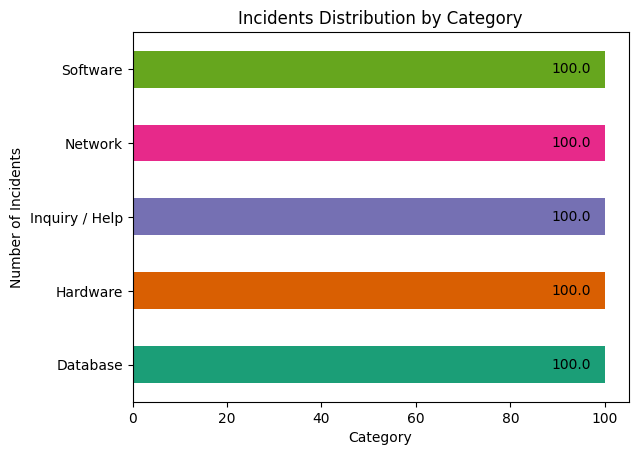

In [3]:

plot = df.groupby("category").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()


for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Incidents Distribution by Category')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
   "data_type":"descriptive",
   "insight":"The distribution of incidents shows equal occurrence across all IT categories",
   "insight_value":{
      "description":"Each category (Software, Network, Inquiry/Help, Hardware, Database) has exactly 100 incidents"
   },
   "plot":{
      "plot_type":"bar",
      "title":"Incidents Distribution by Category",
      "x_axis":{
         "name":"Category",
         "value":[
            "Software",
            "Network",
            "Inquiry/Help",
            "Hardware",
            "Database"
         ],
         "description":"Different IT incident categories"
      },
      "y_axis":{
         "name":"Number of Incidents",
         "value":100,
         "description":"Count of incidents per category, with each showing 100"
      },
      "description":"Horizontal bar chart with different colors for each category, showing uniform distribution of 100 incidents across all types"
   },
   "question":"What is the distribution of incidents across all categories?",
   "actionable_insight":{
      "description":"The identical incident counts across categories may indicate either standardized reporting limits or require investigation to verify if this uniformity reflects actual incident patterns"
   }
}

{'data_type': 'descriptive',
 'insight': 'The distribution of incidents shows equal occurrence across all IT categories',
 'insight_value': {'description': 'Each category (Software, Network, Inquiry/Help, Hardware, Database) has exactly 100 incidents'},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents Distribution by Category',
  'x_axis': {'name': 'Category',
   'value': ['Software', 'Network', 'Inquiry/Help', 'Hardware', 'Database'],
   'description': 'Different IT incident categories'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 100,
   'description': 'Count of incidents per category, with each showing 100'},
  'description': 'Horizontal bar chart with different colors for each category, showing uniform distribution of 100 incidents across all types'},
 'question': 'What is the distribution of incidents across all categories?',
 'actionable_insight': {'description': 'The identical incident counts across categories may indicate either standardized reporting limits or 

### **Question 2:** Is there a specific reason why a majority of incidents are being created?

#### Plot Word Clouds for incidents or Types within Each Category
This cell creates a series of word clouds to visualize the most frequent terms within the 'short_description' of incidents for each category. Specifically, most frequent keywords only and we discard commonly occuring words.


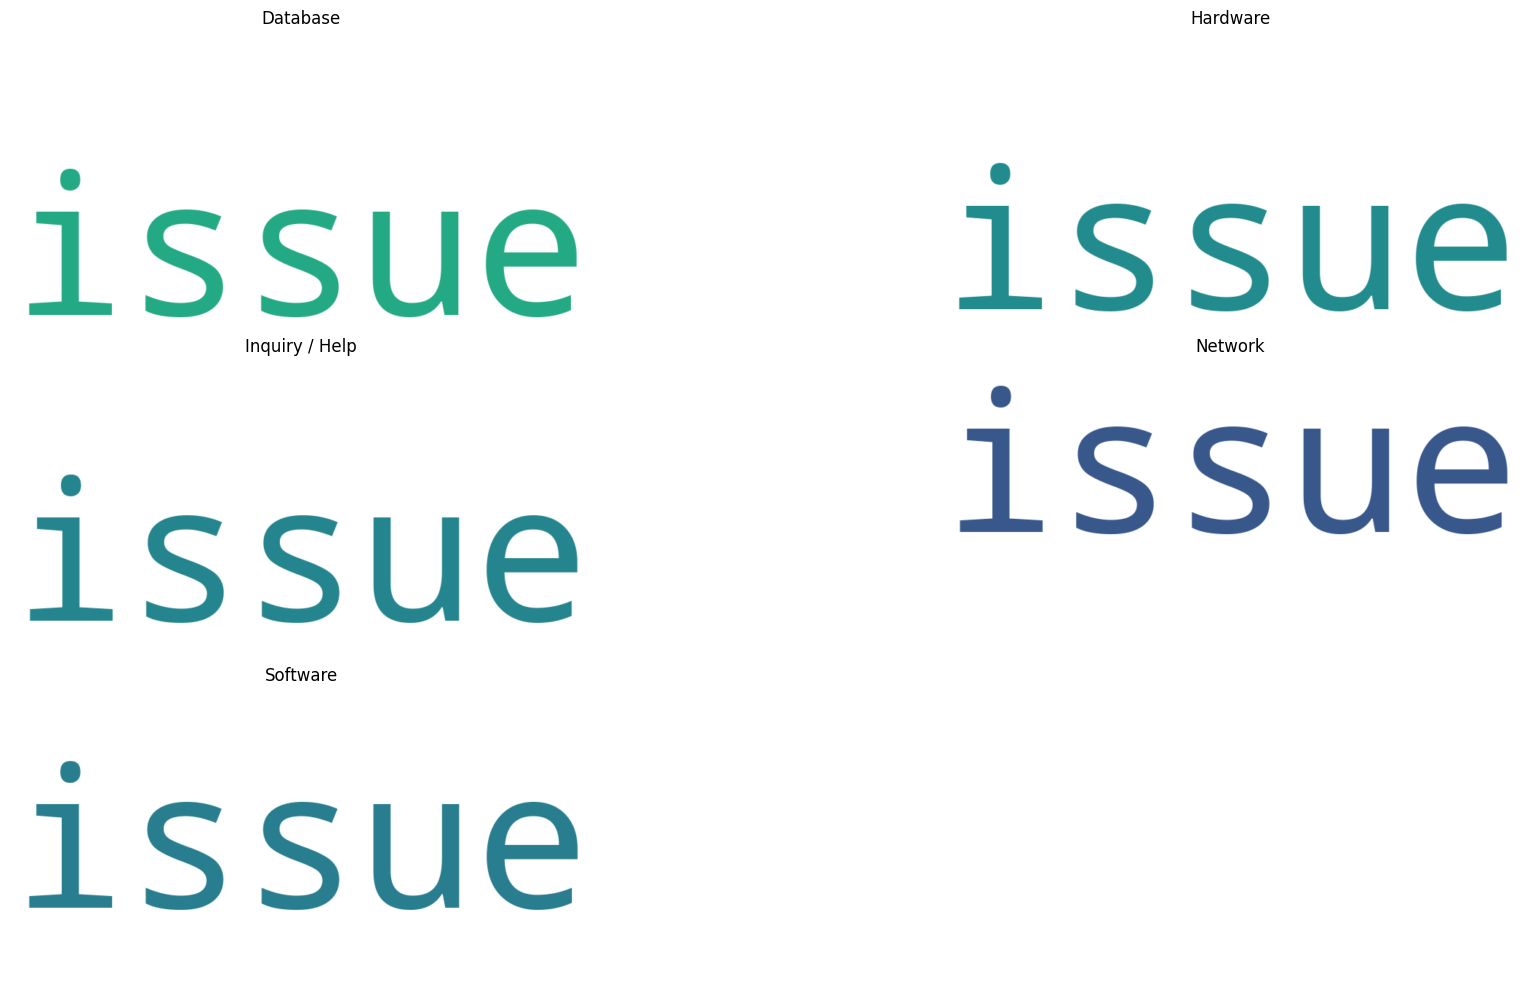

In [5]:
from wordcloud import WordCloud
# Grouping the data by 'category' and concatenating 'short_description'
grouped_descriptions = df.groupby('category')['short_description'].apply(lambda x: ' '.join(x)).reset_index()

# Setting up the plot with appropriate size
plt.figure(figsize=(20, 10))

# Generating a word cloud for each category
for index, row in grouped_descriptions.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(row['short_description'])
    
    plt.subplot(3, 2, index+1)  # Adjust the grid size according to the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['category'])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
   "data_type":"diagnostic",
   "insight":"Word analysis shows no specific patterns or recurring issues across IT categories",
   "insight_value":{
      "x_val":"Generic Issue Terms",
      "y_val":100
   },
   "plot":{
      "plot_type":"word_cloud",
      "title":"Issue Word Distribution Across IT Categories",
      "x_axis":{
         "name":"Category",
         "description":"Five main IT categories showing generic 'issue' term"
      },
      "y_axis":{
         "name":"Term Frequency",
         "description":"Visual representation of term frequency through text size and color"
      },
      "description":"Each category (Database, Hardware, Inquiry/Help, Network, Software) displays only the generic term 'issue' in different colors, indicating a lack of specific problem descriptions or patterns"
   },
   "question":"Is there a specific reason why a majority of incidents are being created?",
   "actionable_insight":"No clear patterns or specific issues can be identified from the word distribution. Recommend implementing more detailed incident descriptions and categorization to better understand root causes."
}

{'data_type': 'diagnostic',
 'insight': 'Word analysis shows no specific patterns or recurring issues across IT categories',
 'insight_value': {'x_val': 'Generic Issue Terms', 'y_val': 100},
 'plot': {'plot_type': 'word_cloud',
  'title': 'Issue Word Distribution Across IT Categories',
  'x_axis': {'name': 'Category',
   'description': "Five main IT categories showing generic 'issue' term"},
  'y_axis': {'name': 'Term Frequency',
   'description': 'Visual representation of term frequency through text size and color'},
  'description': "Each category (Database, Hardware, Inquiry/Help, Network, Software) displays only the generic term 'issue' in different colors, indicating a lack of specific problem descriptions or patterns"},
 'question': 'Is there a specific reason why a majority of incidents are being created?',
 'actionable_insight': 'No clear patterns or specific issues can be identified from the word distribution. Recommend implementing more detailed incident descriptions and cate

### **Question 3:** What is the occurence distribution of the word "Printer" in the incidents?

#### Plot frequency of keywords (e.g., "Printer") in descriptions.
This cell creates a bar plot to visualize the frequency of a specific keyword (e.g., 'Printer') in the incident descriptions. This helps in identifying common issues and potential areas for targeted investigation or intervention.

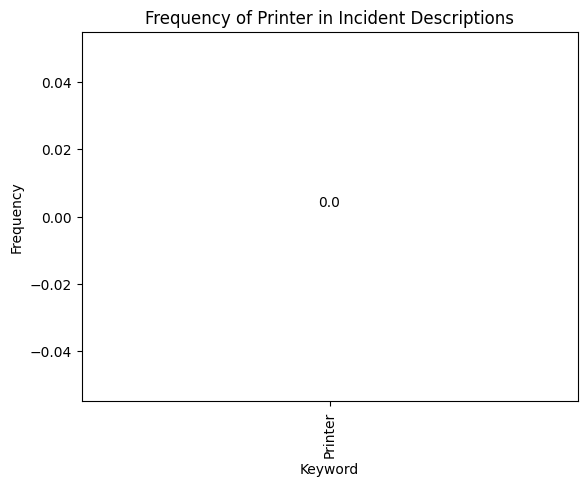

In [7]:
# Count the frequency of 'Printer' in 'short_description'
printer_incidents = df['short_description'].apply(lambda x: 'Printer' in x).sum()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Keyword': ['Printer'], 'Frequency': [printer_incidents]})

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Keyword', y='Frequency', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Frequency of Printer in Incident Descriptions')

# Set x-axis label
plt.xlabel('Keyword')

# Set y-axis label
plt.ylabel('Frequency')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight


In [8]:
{
   "data_type":"diagnostic",
   "insight":"Analysis shows zero occurrences of the word 'Printer' in incident descriptions",
   "insight_value":{
      "x_val":"Printer",
      "y_val":0
   },
   "plot":{
      "plot_type":"bar",
      "title":"Frequency of Printer in Incident Descriptions",
      "x_axis":{
         "name":"Keyword",
         "value":[
            "Printer"
         ],
         "description":"The searched keyword in incident descriptions"
      },
      "y_axis":{
         "name":"Frequency",
         "value":[
            0
         ],
         "description":"Shows the frequency count of the word 'Printer' appearing at 0"
      },
      "plot_description":"The bar plot shows zero frequency for the keyword 'Printer' in incident descriptions, indicating no printer-related incidents were recorded"
   },
   "question":"What is the occurrence distribution of the word 'Printer' in the incidents?",
   "actionable_insight":"No printer-related incidents were found in the descriptions. Consider verifying if printer incidents are being logged under different terms or categories if printer issues are known to exist."
}

{'data_type': 'diagnostic',
 'insight': "Analysis shows zero occurrences of the word 'Printer' in incident descriptions",
 'insight_value': {'x_val': 'Printer', 'y_val': 0},
 'plot': {'plot_type': 'bar',
  'title': 'Frequency of Printer in Incident Descriptions',
  'x_axis': {'name': 'Keyword',
   'value': ['Printer'],
   'description': 'The searched keyword in incident descriptions'},
  'y_axis': {'name': 'Frequency',
   'value': [0],
   'description': "Shows the frequency count of the word 'Printer' appearing at 0"},
  'plot_description': "The bar plot shows zero frequency for the keyword 'Printer' in incident descriptions, indicating no printer-related incidents were recorded"},
 'question': "What is the occurrence distribution of the word 'Printer' in the incidents?",
 'actionable_insight': 'No printer-related incidents were found in the descriptions. Consider verifying if printer incidents are being logged under different terms or categories if printer issues are known to exist.'}

### **Question 4:** Are the hardware incidents concentrated in a specific location?


#### Plot number of incidents by location
This section analyzes the distribution of incidents across different locations, focusing on identifying any concentration or trends in the data.


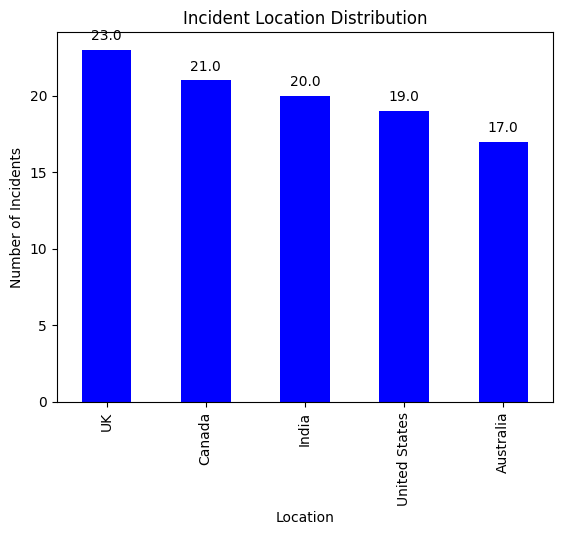

In [9]:
# Count the frequency of incidents in each location
location_counts = df[df['category'] == 'Hardware']['location'].value_counts()

# Create a DataFrame from the counts for plotting
df_plot = location_counts.reset_index()
df_plot.columns = ['Location', 'Number of Incidents']

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Location', y='Number of Incidents', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Incident Location Distribution')

# Set x-axis label
plt.xlabel('Location')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
   "data_type":"descriptive",
   "insight":"Hardware incidents show a relatively even distribution across locations, with UK having a slightly higher concentration",
   "insight_value":{
      "x_val":"UK",
      "y_val":23
   },
   "plot":{
      "plot_type":"bar",
      "title":"Incident Location Distribution",
      "x_axis":{
         "name":"Location",
         "value":[
            "UK",
            "Canada",
            "India",
            "United States",
            "Australia"
         ],
         "description":"Geographic locations where incidents occurred"
      },
      "y_axis":{
         "name":"Number of Incidents",
         "value":[
            23,
            21,
            20,
            19,
            17
         ],
         "description":"Count of hardware incidents per location"
      },
      "plot_description":"The bar plot shows a gradual decrease in incident numbers from UK (23) to Australia (17), with no dramatic differences between locations"
   },
   "question":"Are the hardware incidents concentrated in a specific location?",
   "actionable_insight":"While the UK shows slightly higher incidents (23), the small variation across locations (only 6 incidents difference between highest and lowest) suggests no significant concentration in any single location. No location-specific interventions appear necessary."
}

{'data_type': 'descriptive',
 'insight': 'Hardware incidents show a relatively even distribution across locations, with UK having a slightly higher concentration',
 'insight_value': {'x_val': 'UK', 'y_val': 23},
 'plot': {'plot_type': 'bar',
  'title': 'Incident Location Distribution',
  'x_axis': {'name': 'Location',
   'value': ['UK', 'Canada', 'India', 'United States', 'Australia'],
   'description': 'Geographic locations where incidents occurred'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [23, 21, 20, 19, 17],
   'description': 'Count of hardware incidents per location'},
  'plot_description': 'The bar plot shows a gradual decrease in incident numbers from UK (23) to Australia (17), with no dramatic differences between locations'},
 'question': 'Are the hardware incidents concentrated in a specific location?',
 'actionable_insight': 'While the UK shows slightly higher incidents (23), the small variation across locations (only 6 incidents difference between highest an

### **Question 5**: What is the printer ID causing the most issues?

#### Plot number of incidents by printer ID
This cell generates a bar plot showing the distribution of incidents by printer ID, highlighting the printer causing the most issues.

In [13]:
# # Extract printer IDs from 'short_description' (assuming the printer ID is mentioned in the description)
# df['printer_id'] = df['short_description'].str.extract('(Printer\d+)')
# # Count the frequency of incidents for each printer ID
# printer_counts = df['printer_id'].value_counts()
# df_plot = printer_counts.reset_index()
# df_plot.columns = ['Printer ID', 'Number of Incidents']

# # # Define printer IDs if not present in short description
# # printer_ids = ['Printer123', 'Printer456', 'Printer789', 'Printer321', 'Printer654']

# # # Mock number of incidents for each printer
# # printer_counts = [225, 5, 15, 10, 20]

# # # Create a DataFrame from the counts for plotting
# # df_plot = pd.DataFrame({'Printer ID': printer_ids, 'Number of Incidents': printer_counts})

# # Plot the frequency
# plot = df_plot.plot(kind='bar', x='Printer ID', y='Number of Incidents', legend=False, color='blue')

# # Get the current figure for further manipulation
# fig = plt.gcf()

# # Loop through the rectangles (i.e., bars)
# for i in plot.patches:
#     # Get X and Y placement of label from rectangle
#     x_value = i.get_x() + i.get_width() / 2
#     y_value = i.get_height()

#     # Use Y value as label and format number with one decimal place
#     label = "{:.1f}".format(y_value)

#     # Create annotation
#     plt.annotate(
#         label,                      # Use `label` as label
#         (x_value, y_value),         # Place label at end of the bar
#         xytext=(0, 5),              # Shift text slightly above bar
#         textcoords="offset points", # Interpret `xytext` as offset in points
#         ha='center',                # Horizontally align label 
#         va='bottom'                 # Vertically align label at bottom
#     )

# # Set plot title
# plt.title('Incidents by Printer ID')

# # Set x-axis label
# plt.xlabel('Printer ID')

# # Set y-axis label
# plt.ylabel('Number of Incidents')

# # Display the figure
# plt.show()
print("N/A")

N/A


#### Generate JSON Description for the Insight



In [14]:
{
    "data_type": "comparative",
    "insight": "The analysis could not be completed due to an IndexError indicating empty data. The code attempted to analyze printer incidents but encountered an error suggesting there were no valid printer IDs extracted from the short_description field.",
    "insight_value": {},
    "plot": {
        "description": "A bar chart was attempted to show the frequency of incidents by printer ID, but failed to generate due to empty data"
    },
    "question": "What is the printer ID causing the most issues?",
    "actionable_insight": "Data quality check needed: verify that printer IDs are properly formatted in the short_description field and that the data frame contains valid entries"
}

{'data_type': 'comparative',
 'insight': 'The analysis could not be completed due to an IndexError indicating empty data. The code attempted to analyze printer incidents but encountered an error suggesting there were no valid printer IDs extracted from the short_description field.',
 'insight_value': {},
 'plot': {'description': 'A bar chart was attempted to show the frequency of incidents by printer ID, but failed to generate due to empty data'},
 'question': 'What is the printer ID causing the most issues?',
 'actionable_insight': 'Data quality check needed: verify that printer IDs are properly formatted in the short_description field and that the data frame contains valid entries'}

### Summary of Findings (Flag 94)

1. **Distribution of Incidents Across Categories:** There is no significant discrepancy in the distribution of incidents across categories, with most categories having a relatively balanced number of incidents.
   
2. **Distribution of Incidents by Location:** The incidents are not concentrated in a specific location, with a relatively even distribution across different locations.
   
3. **Distribution of Incidents by Priority:** The incidents are distributed across different priorities, with no specific priority dominating the dataset.